<a href="https://colab.research.google.com/github/fcoelhomrc/MachineLearning/blob/main/APC_Exercises/FisherDiscriminant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# [Fisher Discriminant](https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Fisher's_linear_discriminant)

Suppose we want to separate feature vectors $x$ into two classes. 

We can use our training data to compute the means $\mu_1, \mu_2$ for each class, and consider the vector $\mu_1 - \mu_2$. The normal to this difference defines a hyper-plane, onto which we will then project our features $x \to wx$.

More formally:

$$
\bar{x}_j = \frac{1}{|C_j|} \sum_{i:\, x_i \in C_j} x_i, \quad j \in \{1, 2\}
$$

and we want to maximize:

$$
\underset{W}{\max} (W^T \bar{x}_2 - W^T \bar{x}_1)^2
$$

But we can do better than this. This process essentially projects the features into a 1D distribution. So far, we try to have their means as far apart as possible. **If we also minimize the variance of each class distribution**, they will be easier to separate. Therefore, we consider instead

$$
\underset{W}{\max} \frac{(W^T \bar{x}_2 - W^T \bar{x}_1)^2}{S_1^2 + S_2^2} \equiv \underset{W}{\max} J(W)
$$

where $S_j = \sum_{i:\, x_i\in C_j}(W^T x_i - W_T \bar{x}_j)$.

We can rewrite $J(W)$ as 

$$
J(W) = \frac{W^T S_B W}{W^T S_W W}
$$
where $S_B = (\bar{x}_2 - \bar{x}_1)(\bar{x}_2 - \bar{x}_1)^T$ and 
$S_W = \sum_{j\in\{1, 2\}} \sum_{i:\, x_i \in C_j} (x_i - \bar{x}_j)(x_i - \bar{x}_j)^T$

The solution for this optimization problem is given by

$$
W^* = \underset{W}{\arg\max} J(W) \propto S_W^{-1}(\bar{x}_2 - \bar{x}_1)
$$

This defines the best direction for $W$ but does not fixate the position of the decision boundary hyper-plane $W^T x = c$, where $c$ is a unespecified threshold. 

A rule of thumb for $c$ is to define it as 

$$
c = \frac{1}{2}W^T (\bar{x}_1 + \bar{x}_2)
$$

The decision is taken by computing:

$$
\hat{y} = 
\begin{cases}
W^T x \ge c, \quad \hat{y} = C_1 \\
W^T x < c, \quad \hat{y} = C_2
\end{cases}
$$

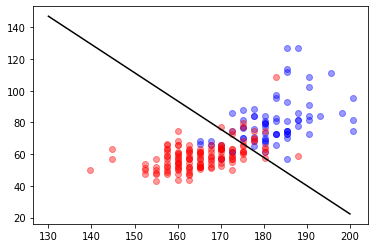

In [24]:
loaded = np.loadtxt("heightWeightData.txt", delimiter=",")
y, X = loaded[:, 0], loaded[:, 1:]

mask1 = (y == 1)
mask2 = (y == 2)
X1 = X[mask1] # shape (num_examples_class1, num_features)
X2 = X[mask2] 

m1 = X1.mean(axis=0)[:, np.newaxis] # shape (num_features, 1)
m2 = X2.mean(axis=0)[:, np.newaxis]
Sb = (m2 - m1) @ (m2 - m1).T
Sw = ( 
        ((X1 - m1.reshape(1, -1)).T @ (X1 - m1.reshape(1, -1))) +
        ((X2 - m2.reshape(1, -1)).T @ (X2 - m2.reshape(1, -1)))
)
w = np.linalg.solve(Sw, m2 - m1)
w /= np.linalg.norm(w, ord=2)
c = w.T @ (m1 + m2) / 2

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], color="b", marker="o", alpha=0.4)
plt.scatter(X2[:, 0], X2[:, 1], color="r", marker="o", alpha=0.4)

# plot decision boundary
x = np.linspace(130, 200, num=1000)
y = -w[0, 0] / w[1, 0] * x + c[0, 0] / w[1, 0]
plt.plot(x, y, color="black")
plt.show()

# Hinge Loss

This loss is defined as 

$$
l(x, y) = \max{(0, 1 - y f(x))}, \quad y \in \{ -1, 1 \}
$$

$$
\mathcal{L}(\theta) = \frac{1}{n}\sum_{i=1}^{n} l(x_i, y_i; \theta)
$$

where $f(x; \theta) = \theta^T x + \theta_0$

The intuition behind is the following:

If we want $f(x)$ to predict the class 1, then if it evaluates to 1 the loss is zero (we don't worry about it) but if it doesn't, we worry about it in proportion to the error. Same thing goes for class -1.

The decision is taken according to 
$$
\hat{y} =
\begin{cases}
1, \,\, f(x) \ge 0 \\
-1, f(x) < 0
\end{cases}
$$

This forces the classifier not only to classify correctly, but the decision must allow some room.

As it is, it doesn't do anything. This is because if we enlarge/reduce this margin the decision boundary does not change.

Instead, use regularized Hinge loss:


$$
\mathcal{L}(\theta) = \frac{1}{n}\sum_{i=1}^{n} l(x_i, y_i; \theta) + \lambda || \theta ||^2
$$

This constrains the model in such a way that the margin now changes decision boundary. 

Usually, we write this as
$$
\mathcal{L}(\theta) = \frac{C}{n}\sum_{i=1}^{n} l(x_i, y_i; \theta) + || \theta ||^2
$$

where $C > 0$, which controls regularization strength (smaller $C$, stronger regularization).


In [33]:
X = np.array([[0, 1], [1, 0], [0, 0], [2, 2], [2, 3], [3, 2]])
y = np.array([-1, -1, 1, 1, 1, 1]).reshape(-1, 1)

W = np.array([[2, 1], [-2, -1], [1, 1], [-1, -1], [2, 1]])
b = np.array([30, -30, -2, 2, -1]).reshape(-1, 1)

In [77]:
def hinge(X, y, w, b):
    fx = w @ X.T + b
    loss = []
    for i, label in enumerate(y):
        loss.append(float(max(0, 1 - label * fx[i])))
    return sum(loss)/len(loss)

In [85]:
results = []
for i, w in enumerate(W):
    results.append(hinge(X, y, w, b[i]))

In [86]:
results

[10.833333333333334, 24.166666666666668, 0.5, 2.5, 0.8333333333333334]

In [82]:
def reg_hinge(X, y, w, b, C=0.01):
    fx = w @ X.T + b
    loss = []
    for i, label in enumerate(y):
        l = C * float(max(0, 1 - label * fx[i]))
        l += np.linalg.norm(w, ord=2)
        loss.append(l)
    return sum(loss)/len(loss)

In [83]:
results = []
for i, w in enumerate(W):
    results.append(reg_hinge(X, y, w, b[i]))
results

[2.344401310833123,
 2.4777346441664565,
 1.419213562373095,
 1.4392135623730953,
 2.244401310833123]

In [84]:
results = []
for i, w in enumerate(W):
    results.append(reg_hinge(X, y, w, b[i], C=10))
results

[110.56940131083314,
 243.90273464416643,
 6.414213562373093,
 26.414213562373096,
 10.569401310833122]